*이 노트북은 제이크 반더플라스(Jake VanderPlas)의 [A Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp)(OReilly Media, 2016)를 기반으로 만들어졌습니다. 이 내용은 [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) 라이센스를 따릅니다. 전체 노트북의 목록은 https://github.com/rickiepark/WhirlwindTourOfPython 에서 볼 수 있습니다.*

<!--NAVIGATION-->
< [문자열과 정규 표현식](14-문자열과 정규 표현식.ipynb) | [목차](목차.ipynb) | [더 읽을 거리](16-Further-Resources.ipynb) >

# 데이터 과학 도구 소개

파이썬을 과학 컴퓨팅과 데이터 과학에 사용하고 싶다면 사용가히 편리한 패키지가 여러개 있습니다. 이 절은 그 중에 중요한 몇 개를 소개하겠습니다. 여러분이 만들려고 하는 애플리케이션에 도움이 될 것입니다. *아나콘다*나 *미니콘다* 환경을 사용하고 있다면 다음 명령으로 관련 패키지를 설치할 수 있습니다:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```
차례대로 간단히 살펴보죠.

## 넘파이(NumPy): 수치 파이썬(Numerical Python)

넘파이는 파이썬에서 다차원 밀집(dense) 배열을 효율적으로 저장하고 조작하는 도구입니다. 넘파이의 주요 기능은 다음과 같습니다:

- 베터, 행렬과 고차원 데이터셋을 효율적으로 저장하고 조작할 수 있는 ``ndarray`` 구조를 제공합니다.
- 간단한 원소별 산술 연산에서부터 복잡한 선형 대수 연산까지 데이터를 조작하기 위한 명료하고 효과적인 문법을 제공합니다.

가장 간단한 경우 넘파이는 파이썬의 리스트와 비슷합니다. 예를 들어 1에서 9까지 숫자를 담은 배열을 다음과 같이 만듭니다(파이썬의 내장 ``range()``와 비교해 보세요):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

넘파이 배열은 데이터를 효율적으로 저장할 뿐만아니라 이 데이터에 대한 효율적인 원소별 연산을 제공합니다.
예를 들어 배열의 각 원소를 거듭제곱하려면 배열에 "``**``" 연산자를 직접 적용할 수 있습니다:

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

동일한 결과를 내는 파이썬의 리스트 내포와 비교해 보세요:

In [3]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

(1차원에 제한된)파이썬 리스트와는 달리 넘파이 배열은 다차원이 가능합니다.
예를 들어 ``x`` 배열을 3x3 배열로 바꾸어 보겠습니다:

In [4]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

2차원 배열은 행렬을 나타내며 넘파이는 일반적인 행렬 연산을 효율적으로 수행할 수 있습니다. 예를 들어 ``.T``를 사용해 행렬을 전치할 수 있습니다:

In [5]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

또는 ``np.dot``을 사용해 행렬-벡터 곱을 할 수 있습니다:

In [6]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

또는 고유값 분해 같은 더 복잡한 연산도 가능합니다:

In [7]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

이런 선형 대수 연산은 최신 데이터 분석, 특히 머신 러닝과 데이터 마이닝 분야에 꼭 필요합니다.

## 판다스(Pandas): 레이블된 열 중심의 데이터

판다스는 넘파이보다 더 최근에 등장한 패키지이고 넘파이를 사용합니다.
판다스는 R 같은 언어를 사용했던 사용자들에게 친숙한 DataFrame 형태의 다차원 데이터에 레이블된 인터페이스를 제공합니다.
판다스의 DataFrame은 다음과 같습니다:

In [8]:
import pandas as pd
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


판다스에서는 이름으로 열을 선택할 수 있습니다:

In [9]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

문자열 열에는 문자열 연산을 적용할 수 있습니다:

In [10]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

숫자형 열에는 합계 메서드를 적용할 수 있습니다:

In [11]:
df['value'].sum()

21

그리고 가장 중요한 것은 데이터베이스 스타일의 조인(join)과 그룹핑이 가능합니다:

In [12]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


이렇게 같은 레이블을 같는 모든 원소의 합을 한 줄의 코드로 계산할 수 있습니다. 넘파이나 파이썬 내장 함수를 사용하면 훨씬 번거롭고 더 비효율적입니다.

## 맷플롯립(Matplotlib): 매트랩(MatLab) 스타일의 시각화

맷플롯립은 현재 파이썬에서 가장 인기있는 과학 그래픽 패키지입니다.
인터페이스가 좀 번거로운 것은 사실이지만 다양한 종류의 그래프를 만들 수 있는 강력한 라이브러리입니다.

맷플롯립을 사용하려면 관례상 패키지를 ``plt``로 임포팅합니다.

In [13]:
# 주피터 노트북에서 실행할 때 반응형 그래프를 만들어 줍니다
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # R의 ggplot 스타일로 그래프를 만듭니다

이제 약간의 데이터를 만들어 (당연히 넘파이 배열로) 그래프를 그려 보죠:

<IPython.core.display.Javascript object>


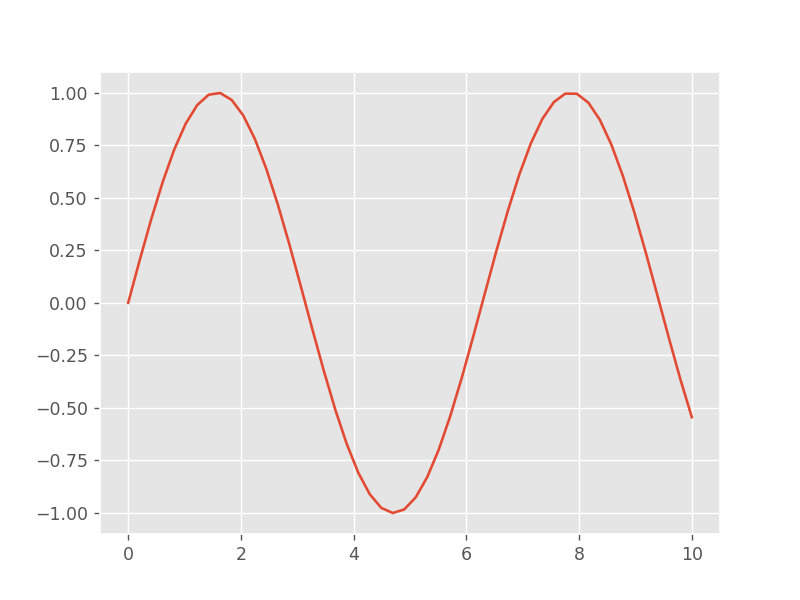

In [15]:
x = np.linspace(0, 10)  # 0에서 10까지 범위의 값
y = np.sin(x)           # 사인 함수 값
plt.plot(x, y);         # 선 그래프 그리기o

이 코드를 직접 실행하면 인터렉티브한 그래프를 볼 수 있고 그래프를 이동, 확대하여 데이터를 탐색할 수 있습니다.

이 예는 가장 간단한 맷플롯립의 그래프이고 다양한 그래프 종류를 [맷플롯립의 온라인 갤러리](http://matplotlib.org/gallery.html)에서 볼 수 있습니다.

## 사이파이(SciPy): 과학 파이썬

사이파이는 넘파이를 기반으로 한 과학 함수들의 모음입니다.
잘 알려진 수치 해석 포트란 라이브러리를 래핑하면서 시작하면서 성장해왔습니다.
이 패키지는 여러 서브모듈로 구성되어 있고 각각 특정 종류의 수치 알고리즘들을 구현합니다.
다음은 이중에서 데이터 과학에 중요한 일부를 추렸습니다:

- ``scipy.fftpack``: 고속 푸리에 변환
- ``scipy.integrate``: 수치 적분
- ``scipy.interpolate``: 수치 보간
- ``scipy.linalg``: 선형 대수 루틴
- ``scipy.optimize``: 함수 최적화
- ``scipy.sparse``: 희소 행렬 저장과 선형 대수 함수
- ``scipy.stats``: 통계 분석 루틴

예를 들어 샘플 데이터의 사이의 커브를 보간하는 예를 보겠습니다.

<IPython.core.display.Javascript object>


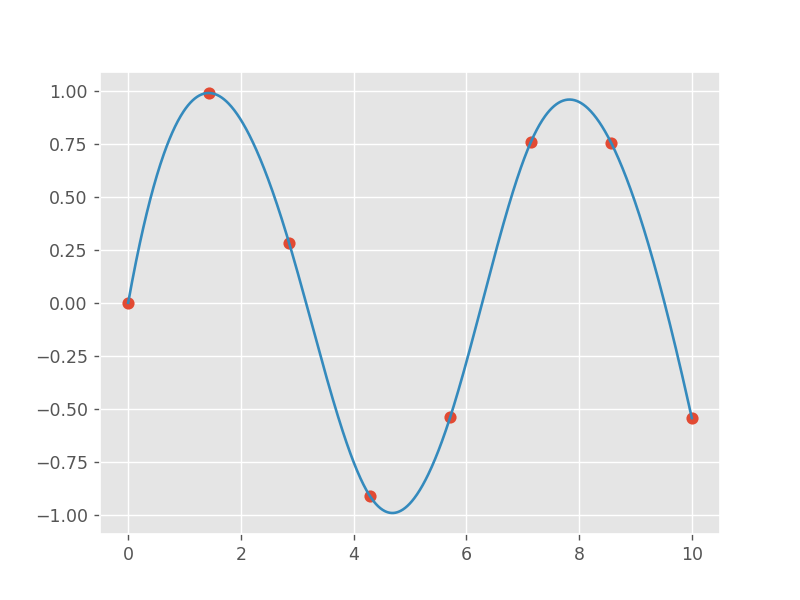

In [16]:
from scipy import interpolate

# 0과 10 사이에 8개의 포인트를 선택합니다
x = np.linspace(0, 10, 8)
y = np.sin(x)

# 세제곱 보간 함수를 만듭니다
func = interpolate.interp1d(x, y, kind='cubic')

# 1,000개의 포인트를 보간합니다
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# 보간 결과를 그래프로 출력합니다
plt.figure()  # 새로운 그래프
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

8개 포인트 사이에 부드러운 보간 결과를 볼 수 있습니다.

## 다른 데이터 과학 패키지

이런 도구를 기반으로 많은 데이터 과학 패키지가 만들어졌습니다. 대표적으로 머신러닝을 위한 [Scikit-Learn](http://scikit-learn.org), 이미지 분석을 위한 [Scikit-Image](http://scikit-image.org), 통계적 모델링을 위한 [Statsmodels](http://statsmodels.sourceforge.net/) 등입니다. 또 천문학과 천체 물리를 위한 [AstroPy](http://astropy.org), 신경 이미지 처리를 위한 [NiPy](http://nipy.org/)와 같이 도메인에 특화된 많은 라이브러리가 있습니다.

당면한 과학, 수치 또는 통계 문제가 무엇이든지 간에 아마 이를 도와줄 수 있는 파이썬 패키지가 준비되어 있을 것입니다.

<!--NAVIGATION-->
< [문자열과 정규 표현식](14-문자열과 정규 표현식.ipynb) | [목차](목차.ipynb) | [더 읽을 거리](16-Further-Resources.ipynb) >